In [2]:
import numpy as np
import matplotlib.pyplot as plt

import uproot
import awkward as ak


In [3]:
file = uproot.open("../datasets/test.f13.root")
branches = file["events/event"]
branches.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event                | UEvent                   | AsGroup(<TBranchElement 'event
TObject              | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
TObject/fUniqueID    | uint32_t                 | AsDtype('>u4')
TObject/fBits        | uint32_t                 | AsDtype('>u4')
fEventNr             | int32_t                  | AsDtype('>i4')
fB                   | double                   | AsDtype('>f8')
fPhi                 | double                   | AsDtype('>f8')
fNes                 | int32_t                  | AsDtype('>i4')
fStepNr              | int32_t                  | AsDtype('>i4')
fStepT               | double                   | AsDtype('>f8')
fNpa                 | int32_t                  | AsDtype('>i4')
fComment             | TString                  | AsStrings()
fParticles           | TClone

In [35]:

px = branches['fParticles.fPx'].array()
py = branches['fParticles.fPy'].array()
pz = branches['fParticles.fPz'].array()
pdg = branches['fParticles.fPdg'].array()

p = np.sqrt(px ** 2 + py ** 2 + pz ** 2)
pt = np.sqrt(px ** 2 + py ** 2)
eta = 0.5*np.log((p+px)/(p-px))

pion = pdg == 211
proton = pdg == 2212
kaon = pdg == 321

pt_pion = pt[pion]
pt_proton = pt[proton]
pt_kaon = pt[kaon]

eta_pion = eta[pion]
eta_proton = eta[proton]
eta_kaon = eta[kaon]

Text(0, 0.5, 'Entries')

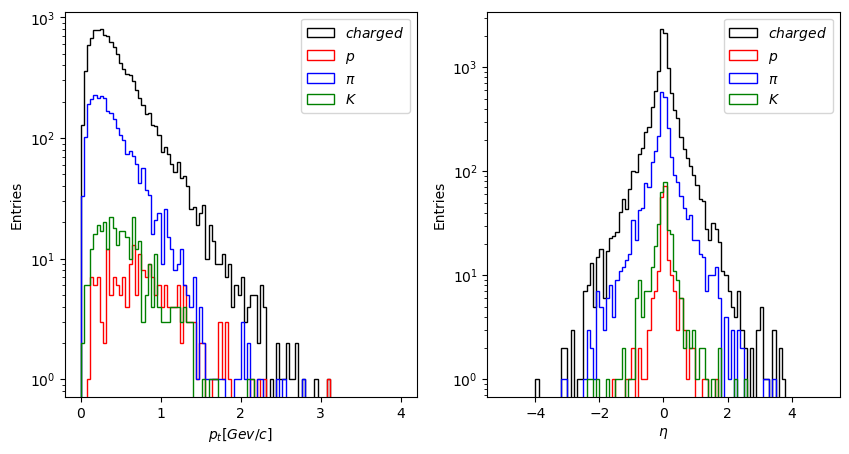

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(ak.flatten(pt), bins=100 ,density=False, color='black',log=True,histtype = 'step', range=(0, 4),label='$charged$')
plt.hist(ak.flatten(pt_proton), bins=100 ,density=False, color='red',log=True,histtype = 'step', range=(0, 4),label='$p$')
plt.hist(ak.flatten(pt_pion), bins=100 ,density=False, color='blue',log=True,histtype = 'step', range=(0, 4),label='$\pi$')
plt.hist(ak.flatten(pt_kaon), bins=100 ,density=False, color='green',log=True,histtype = 'step', range=(0, 4),label='$K$')
plt.legend()
plt.xlabel('$p_t [Gev/c]$')
plt.ylabel('Entries')

plt.subplot(1,2,2)
plt.hist(ak.flatten(eta), bins=100 ,density=False, color='black',log=True,histtype = 'step', range=(-5, 5),label='$charged$')
plt.hist(ak.flatten(eta_proton), bins=100 ,density=False, color='red',log=True,histtype = 'step', range=(-5, 5),label='$p$')
plt.hist(ak.flatten(eta_pion), bins=100 ,density=False, color='blue',log=True,histtype = 'step', range=(-5, 5),label='$\pi$')
plt.hist(ak.flatten(eta_kaon), bins=100 ,density=False, color='green',log=True,histtype = 'step', range=(-5, 5),label='$K$')
plt.legend()
plt.xlabel('$\eta$')
plt.ylabel('Entries')

In [38]:
print('Mean Transverse momentum pions:',np.mean(ak.flatten(pt_pion)))
print('Mean Transverse momentum protons:',np.mean(ak.flatten(pt_proton)))
print('Mean Transverse momentum kaons:',np.mean(ak.flatten(pt_kaon)))


Mean Transverse momentum pions: 0.4044525769955002
Mean Transverse momentum protons: 0.8199095446354551
Mean Transverse momentum kaons: 0.5648998518002651
